# 6.1

(i) 

以下2つの経路が考えられる。
- $v_5 \rightarrow v_6 \rightarrow v_3 \rightarrow v_1 \rightarrow v_3 \rightarrow v_2 \rightarrow v_4 \rightarrow v_3 \rightarrow v_6 \rightarrow v_5$
- $v_5 \rightarrow v_6 \rightarrow v_3 \rightarrow v_2 \rightarrow v_4 \rightarrow v_2 \rightarrow v_3 \rightarrow v_1 \rightarrow v_3 \rightarrow v_6 \rightarrow v_5$

すでに一度訪れた点はスキップすると、以下2つの近似解が得られる。
- $v_5 \rightarrow v_6 \rightarrow v_3 \rightarrow v_1 \rightarrow v_2 \rightarrow v_4 \rightarrow v_5$
- $v_5 \rightarrow v_6 \rightarrow v_3 \rightarrow v_2 \rightarrow v_4 \rightarrow v_1 \rightarrow v_5$

(ii)

最適巡回路から1辺を除くと全域木のなるので、最適巡回路の重みが最小木の重み以下になることはありえないことを考慮すると、

（最適巡回路の重み）$\geq$ （図6.13 (b)）$=$ 1/2（図6.13 (c)）$\geq$ 1/2（図6.13 (d)）

# 6.2

(i) 

$v\in{V}$ とつながる辺に対して、カット $(S, V-S)$ に含まれるへの辺の数を $n_v^1$、含まれない辺の数を $n_v^0$ とすると、 今回の局所探索法で得られるカット $(S^*, V-S^*)$では、任意の $v\in{V}$ について、$n_v^1 \geq n_v^0$ が成り立つ。

また、1つの辺は2つの点とつながるので、$2|E| = \sum_{v\in{V}} (n_v^0+n_v^1)$ が成り立つ。

この局所探索法でのカットに含まれる辺の数は、$\frac{1}{2} \sum_{v\in{V}} n_v^1$ なので、以下が成り立つ。

\begin{align*}
    \frac{1}{2} \sum_{v\in{V}} n_v^1 &\geq \frac{1}{4} \sum_{v\in{V}} (n_v^0+n_v^1) \\
                                     &= \frac{1}{2}|E|
\end{align*}

最大カット数が、辺の総数以下であることは自明なので、この局所探索方は、最大カット問題の0.5-近似解法である。

(ii)

$f(S)$ をカット $(S, V-S)$ に含まれるへの辺の数とすると、

1. $S_0 \leftarrow \empty$
2. for $k=1, \cdots, |V|$ do
    - if there exists $j\in{V}$ which satisfies $f(S_{k-1} \cup \{j\}) > f(S_{k-1})$
        - $j^* \leftarrow \argmax{f(S_{k-1} \cup \{j\} \ | \ j\in{V}) }$
        - $S_k \leftarrow S_{k-1} \cup \{j\}$
    - else $S_k \leftarrow S_{k-1}$
3. return $S_{|V|}$


# 6.3

(i) 

$k$-センター問題の最適クラスタリングを $\tilde{C}_1, \cdots, \tilde{C}_k$、クラスター中心を $\tilde{s}_1, \cdots, \tilde{s}_k$ とする。

同様に、最遠点クラスタリング法で得られるクラスタリングを $C_1^*, \cdots, C_k^*$、クラスター中心を $s_1^*, \cdots, s_k^*$ とする。

$\tilde{U} = \{\tilde{s}_1, \cdots, \tilde{s}_k \}$, $U^* = \{s_1^*, \cdots, s_k^*\}$ とおくと、$\tilde{\delta} = \max{\{ \rho(s_l, \tilde{U}) \ | \ s_l\in{V}\}}$, $\delta^* = \max{\{ \rho(s_l, U^*) \ | \ s_l\in{V}\}}$ について、$\delta^* \leq  2\tilde{\delta}$ が成り立つこと証明したい。

$s_{k+1}^* = \argmax{\{ \rho(s_l, U^*) \ | \ s_l\in{V}\}}$ とおくと、$s_1^*, \cdots, s_k^*, s_{k+1}^*$ のち、少なくとも２点はある $k$-センター問題の最適クラスタリング $\tilde{C}_r\in{\tilde{U}}$ に属することがわかる。

このとき、$s_1^*, \cdots, s_{k+1}^*$ における２点間の距離は $\delta^*$ 以上となる。（そうでないと、最遠点クラスタリング法に矛盾する）

ここで、$\tilde{C}_r$ に $s_i^*$ と $s_j^*$ が属しているとすると、三角不等式より、$\max{\{p(\tilde{s}_r, s_i^*), p(\tilde{s}_r, s_j^*)\}}\geq \frac{\delta^*}{2}$

よって、$\tilde{C}_r$ のクラスタリングの大きさは $\frac{\delta^*}{2}$ 以上であることがわかるので、$\frac{\delta^*}{2} \leq \tilde{\delta} \Leftrightarrow \delta^* \leq  2\tilde{\delta}$ が成り立つ。

(ii)

(i)より、三角不等式の等号成立は、$\tilde{s}_r$ を中心として、$\tilde{s}_r, s_i^*, s_j^*$ が一直線に並ぶ状況である。

このことから、$k=2$ について、以下のような例が考えられる。（$\tilde{\delta} = 1, \ \delta^* = 2$）

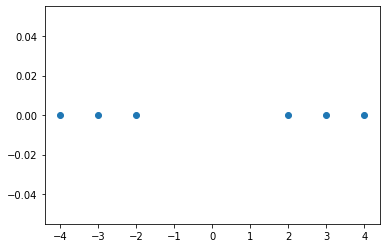

In [5]:
import matplotlib.pyplot as plt
plt.scatter([-4, -3, -2, 2, 3, 4], [0, 0, 0, 0, 0, 0])

# 6.4

(i) 

$j\in{V-S}$ を $S$ に追加した時に、$j$ を端点とした辺のもう一方の端点が $S$ に含まれているかどうかを考える。

$j$ を端点とした辺のもう一方の端点が $S$ に含まれていない辺の集合を $|E'|$ とすると、$f(S \cup \{j\}) - f(S) = |E'|$

$T \supseteq S$ を考えると、$S$ は $T$ の部分集合なので、$f(T \cup \{j\}) - f(T) \leq |E'|$ が成り立つ。

よって、$f(S \cup \{j\}) - f(S) \geq f(T \cup \{j\}) - f(T)$ が成り立つので、$f(S)$ は劣モジュラ関数。

(ii)

(i) と同様
